In [1]:
# Part 1A: Linear Regression Assignment
# Project Name: Email Spam Classification Using Machine Learning


# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define column names for the dataset
column_names = [f'word_freq_{i}' for i in range(1, 49)] + \
               [f'char_freq_{i}' for i in range(1, 7)] + \
               ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'class']

df = pd.read_csv('/content/spambase.data', header=None, names=column_names) # Upload the dataset


print(df.head()) # Print first few rows
print(df.info()) # Print data types

   word_freq_1  word_freq_2  word_freq_3  word_freq_4  word_freq_5  \
0         0.00         0.64         0.64          0.0         0.32   
1         0.21         0.28         0.50          0.0         0.14   
2         0.06         0.00         0.71          0.0         1.23   
3         0.00         0.00         0.00          0.0         0.63   
4         0.00         0.00         0.00          0.0         0.63   

   word_freq_6  word_freq_7  word_freq_8  word_freq_9  word_freq_10  ...  \
0         0.00         0.00         0.00         0.00          0.00  ...   
1         0.28         0.21         0.07         0.00          0.94  ...   
2         0.19         0.19         0.12         0.64          0.25  ...   
3         0.00         0.31         0.63         0.31          0.63  ...   
4         0.00         0.31         0.63         0.31          0.63  ...   

   char_freq_1  char_freq_2  char_freq_3  char_freq_4  char_freq_5  \
0         0.00        0.000          0.0        0.77

In [3]:
X = df.drop('class', axis=1) # Features
y = df['class'] # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # train and test features (X) and label (y)
# Print shapes of train and test data:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (3680, 57)
Shape of X_test: (921, 57)
Shape of y_train: (3680,)
Shape of y_test: (921,)


In [4]:
scaler = StandardScaler() # Scale training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Print shape of newly scaled features:
print('Scaled training features shape:', X_train_scaled.shape)
print('Scaled testing features shape:', X_test_scaled.shape)

Scaled training features shape: (3680, 57)
Scaled testing features shape: (921, 57)


In [5]:
model = LogisticRegression() # Apply logistic regression
model.fit(X_train_scaled, y_train) # Fit model

LogisticRegression()

In [6]:
y_pred = model.predict(X_test_scaled)
# Apply the accuracy score, classification report, and confusion matrix using model predictions
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Precision, Recall, F1-Score and Support
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_rep)
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.9197

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921


Confusion Matrix:
[[506  25]
 [ 49 341]]


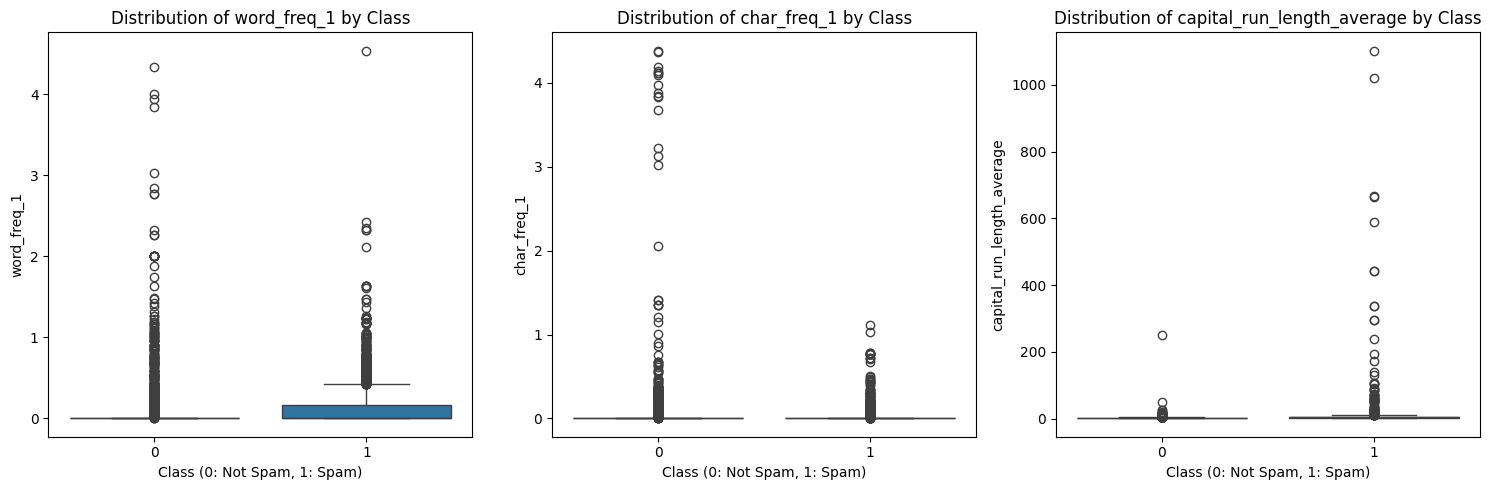

In [7]:
# Box Plot Visualization

# Select three features to visualize: word frequency, character frequency, and capitalization length average
selected_features = ['word_freq_email', 'char_freq_!', 'capital_run_length_average']

# Rename columns for easier plotting and explanation
# Assuming 'word_freq_email' corresponds to 'word_freq_1', 'char_freq_!' to 'char_freq_1'
selected_features = ['word_freq_1', 'char_freq_1', 'capital_run_length_average']


# Create box plots for selected features, colored by the 'class'
plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i + 1)
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel('Class (0: Not Spam, 1: Spam)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

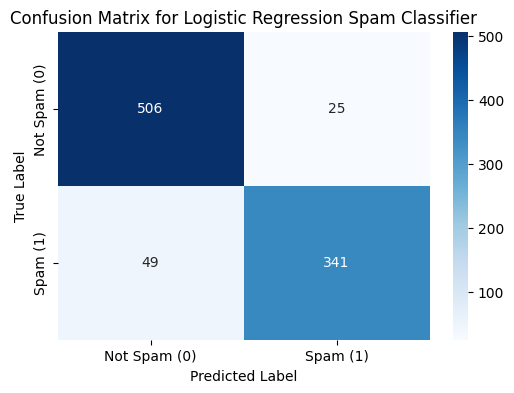

In [8]:
# Part 1B: Logistic Regression (Part 2) -- Continued


# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred) # used label test and prediction values
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Spam (0)", "Spam (1)"],  # include labels for spam and non-spam
            yticklabels=["Not Spam (0)", "Spam (1)"])
plt.title("Confusion Matrix for Logistic Regression Spam Classifier") # title
plt.xlabel("Predicted Label") # add x and y axis labels
plt.ylabel("True Label")
plt.show() # show plot

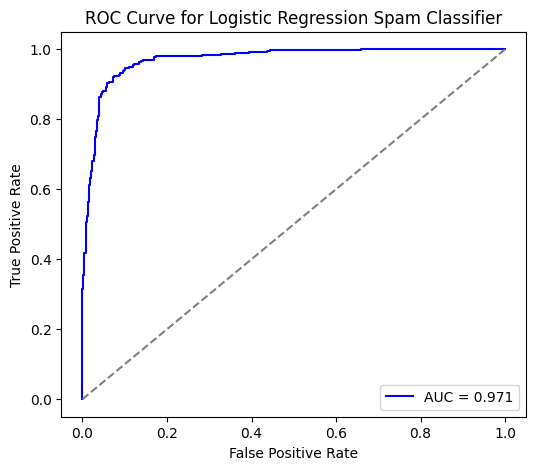

In [12]:
# ROC Curve Visualization

# Import necessary libraries for ROC and AUC from SKLearn
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC score
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # define roc curve
auc_score = roc_auc_score(y_test, y_pred_proba) # creare auc score

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", color="blue") # round AUC to 3 decimal places and make its line blue
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve for Logistic Regression Spam Classifier")
plt.xlabel("False Positive Rate") #  X and Y axis labels
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right") # include legend for AUC score
plt.show()



